In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Case Study -->

Animal Species Image Classification using CNN.

In [1]:
import zipfile
unzip = zipfile.ZipFile("/content/drive/MyDrive/Animal_Dataset.zip",'r')
file_paths = unzip.namelist()
for path in file_paths:
  unzip.extract(path)

In [2]:
ls -1   # extracted successfully.

dataset/
drive/
sample_data/


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# rescale is a part of pre-processing.Used to normaize the range of the convolution network with the help of rescale.
# 1./255 restricts the pixel values in between the range of 0 and 1 instead of 0 and 255.
# zoom range is 0 to 1.

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
pwd          # to see path

'/content'

In [7]:
# loading training data.
x_train=train_datagen.flow_from_directory(r"/content/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)
#target_size = pixel size{height and width of image}.
#class_mode = type of data
#batch_size = number of images in one batch.

Found 1238 images belonging to 4 classes.


In [8]:
# loading testing data.
x_test=test_datagen.flow_from_directory(r"/content/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [9]:
# length of training data -->{1238/24}{total no of images/batch size}
len(x_train)

52

In [10]:
len(x_test)

14

In [11]:
# To check what are classes in x_train -->

x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [12]:
# Creating CNN -->
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [13]:
# initialising the model -->
model = Sequential()

In [14]:
# Adding layers -->
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
# filter = 32
# feature detector = (3,3)
# (64,64,3) = 64,64 is size of image , 3 is the no of channels(RGB)
# relu = removes negative sign from the faeture map matrix

In [15]:
# Adding Max pooling to identify maximum pixel size -->
model.add(MaxPooling2D(pool_size=(2,2)))
#(2,2) = poolsize

In [16]:
# Adding flatten layer to convert data inot input shape (multi D to single vector)-->
model.add(Flatten())

In [17]:
# Adding dense layer (2 hidden layer and one output layer-->
model.add(Dense(300,activation='relu'))        # 300 = no of neurons in hidden layer(can be given manually or using gridsearchcv)
model.add(Dense(150,activation='relu'))        # 150 = no of neurons in second hidden layer
model.add(Dense(4,activation='softmax'))       #output layer # 4 = no of neurons 4 becoz we have 4 classes
# "Softmax" activation function is used for multi class classification

In [18]:
#Compiling our model -->
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss = minimum loss .if we dont get optimal output we use back propagation to update the weight for better results.
#Optimizers are used by algorithms to minimize the error(loss function) and maximize the efficiency of the production.
# metric to calculate accuracy of our model
#Activation is used to calculate a weight total and add the bias to decide whether a neuron should be activated or not.

In [19]:
# fit the model -->
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))
#steps_per_epoch = it is the no of train images divided by the batch size(no of iterations) 
# validations = for testing data
#validation steps = no of validation images(testing image) divided by the best self
#fit = fit is used for loading the data directly into the memory.
#fit_generator = is used when the data is not directly loaded but it is coming from the generator.
#epochs = means once all the images are processed one time individually or forward and backward to the network that is called one epoch.
#one epoch will be completed after 52 iterations in this case.
# In the output first losses were large but with every epoch it got reduced with the help of optimizer and accuracy is increased.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
52/52 [==============================] - 9s 157ms/step - loss: 1.3132 - accuracy: 0.4313 - val_loss: 0.9644 - val_accuracy: 0.5828
Epoch 2/10
52/52 [==============================] - 8s 153ms/step - loss: 0.8535 - accuracy: 0.6511 - val_loss: 0.8043 - val_accuracy: 0.7055
Epoch 3/10
52/52 [==============================] - 8s 153ms/step - loss: 0.7064 - accuracy: 0.7318 - val_loss: 0.4928 - val_accuracy: 0.8129
Epoch 4/10
52/52 [==============================] - 8s 151ms/step - loss: 0.6185 - accuracy: 0.7601 - val_loss: 0.5570 - val_accuracy: 0.7914
Epoch 5/10
52/52 [==============================] - 8s 152ms/step - loss: 0.5622 - accuracy: 0.7835 - val_loss: 0.4735 - val_accuracy: 0.8282
Epoch 6/10
52/52 [==============================] - 8s 151ms/step - loss: 0.5085 - accuracy: 0.7964 - val_loss: 0.3276 - val_accuracy: 0.8865
Epoch 7/10
52/52 [==============================] - 8s 152ms/step - loss: 0.4230 - accuracy: 0.8384 - val_loss: 0.1843 - val_accuracy: 0.9387
Epoch 

Our Model is created , now comes the testing part.

In [20]:
#Before testing, we save our model
model.save("Animal.h5")

In [21]:
#Testing our model -->
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
# Loading our model
model=load_model("Animal.h5")

# .h5 is the extension to save deep learning models

In [23]:
img=image.load_img(r"/content/dataset/Testing/elephants/images (43).jpeg",target_size=(64,64))
#target_size is (64,64) becoz input and output sizes are same.

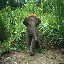

In [24]:
img      #without target_size = (64,64),image displayed in its original shape.

In [ ]:
# Performing preditions -->.
x = image.img_to_array(img)
x            #prints pixel value of our image i narray in float format.

In [26]:
x.ndim         #checking dimension

3

In [27]:
# To expand the dimension-->
x=np.expand_dims(x,axis=0)
x.ndim

4

In [28]:
# Converting image to numpy array and expanding the dimension to make predictions -->
pred = np.argmax(model.predict(x),axis=1)
pred
# array 2 means elephant and we passed image of an elephant

array([2])

In [29]:
#Checking output through indices -->
index = ['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

# this means our model is predicting correct output.

elephants


In [30]:
img=image.load_img(r"/content/dataset/Testing/bears/k4 (91).jpeg",target_size=(64,64))
x = image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)
print(pred)
index = ['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

[0]
bears
